# Repeated Measures ANOVA Cockroach Project - Field Data

In [1]:
import numpy as np
import pandas as pd

Read the Zyrox field file into a pandas dataframe. The current format of the data is "one sample, one line" where all measurements and attributes of a sample are on one line. There are two x columns ('Dose' and 'Treatment') and six y columns. The y values represent the counted cockroaches as explained in the ReadMe. Zyrox is an insecticidal bait applied to sample plots in two doses (represented in 'Dose' column). Control sample plots were untreated.

In [30]:
fieldata = pd.read_csv('/Users/Yvonne/Desktop/Zyrox_Py/Zyrox_field_YKM.csv')
fieldata

,Dose,Treatment,D0_pre,D7_post,D14_post,D21_post,D28_post,D35_post
0,6.9_gpm2,Control,48,34,51,23,26,47
1,6.9_gpm2,Control,145,182,141,172,165,144
2,6.9_gpm2,Control,67,61,21,23,35,17
3,6.9_gpm2,Control,47,54,42,64,72,50
4,6.9_gpm2,Zyrox,128,10,2,3,8,9
5,6.9_gpm2,Zyrox,72,6,0,0,5,1
6,6.9_gpm2,Zyrox,42,5,0,5,8,12
7,6.9_gpm2,Zyrox,172,2,1,1,1,2
8,6.9_gpm2,Zyrox,22,2,2,0,5,0
9,2_gpm2,Control,30,34,64,64,62,80


Now let's graph the data - here is the example graph that we want to replicate using Python. We know we want a two paneled graph (a separate graph for each dose), and a side by side mean +/- standard error comparison of Zyrox and Control treatments at each y sampling point (D0, D7, D14, etc). B. asahinai = cockroaches

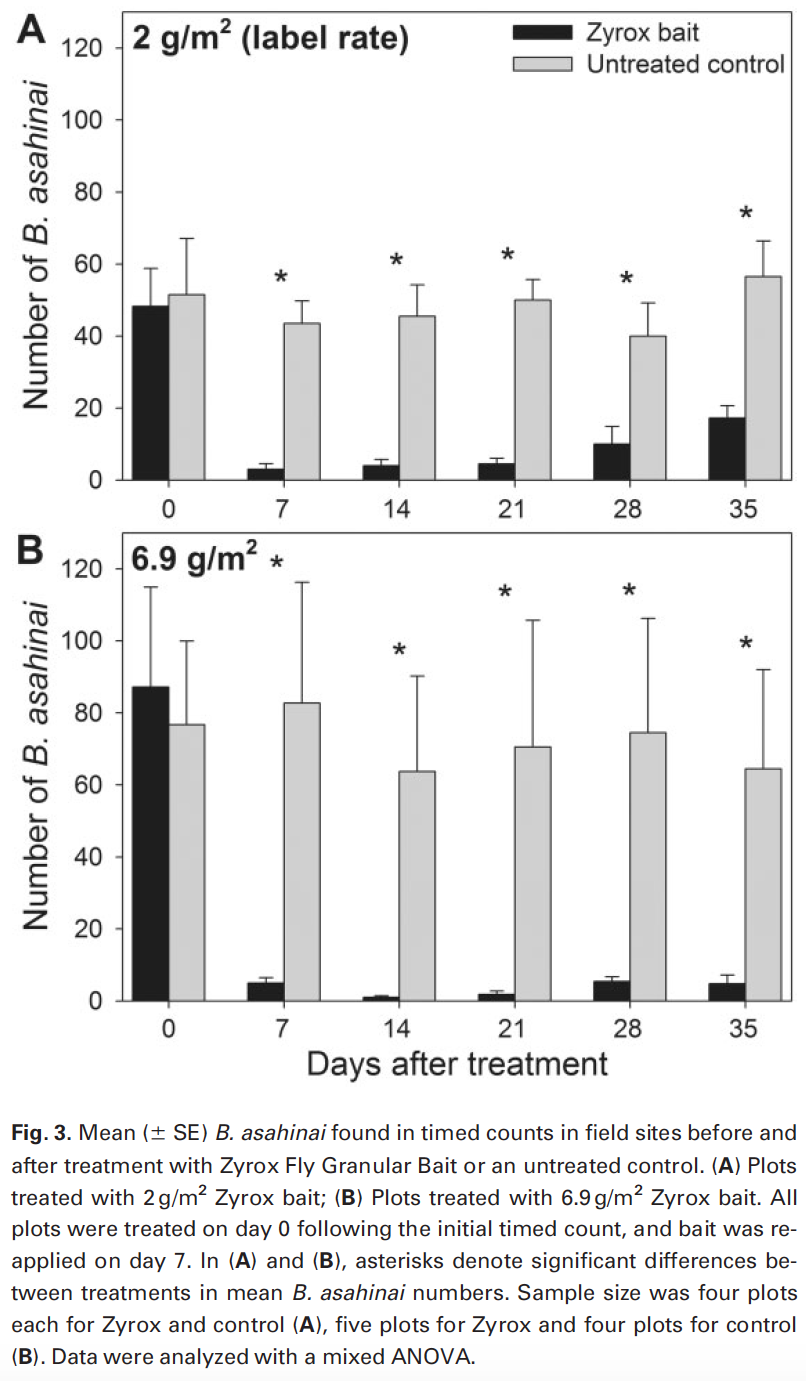

In [14]:
from IPython.display import Image
Image('/Users/Yvonne/Desktop/Zyrox_Py/Field_graph.png')

Now let's search Python plotting libraries for similar examples to the above graph. There's a grouped barplots example here in seaborn.

https://seaborn.pydata.org/examples/factorplot_bars.html

If we look at the example code, we can see the graph was done using factorplot. We can take a closer look at factorplot here.

https://seaborn.pydata.org/generated/seaborn.factorplot.html

The last example on the factorplot page shows a similar multi-paneled graph to what we want to make (along with the code used to generate it) using the titanic dataset. 

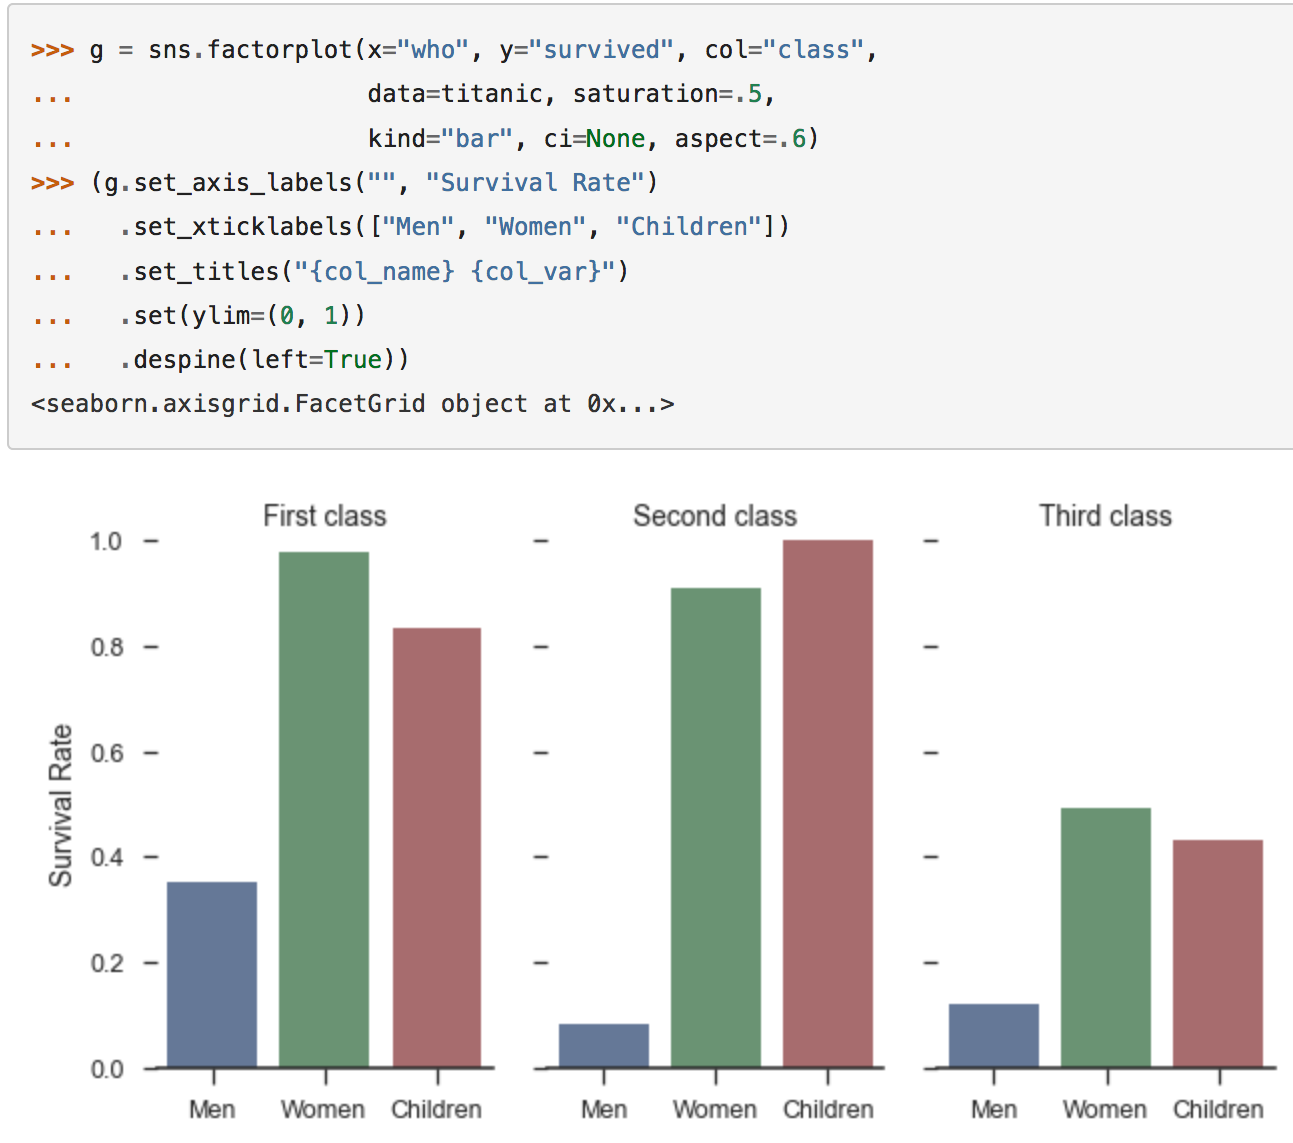

In [15]:
Image('/Users/Yvonne/Desktop/Zyrox_Py/sns_factorplot.png')

We can see from the code (pasted again below) that there is only one x and one y column assigned to make the above graph. Let's take a look at the titatnic dataset to see what these columns look like.


g = sns.factorplot(x="who", y="survived", col="class", data=titanic, saturation=.5, kind="bar", ci=None, aspect=.6)

In [3]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


It's clear from the code and titanic dataset that our 'fieldata' dataframe is not in the correct shape to plug into factorplot. We currently have six y columns, and we need all y information to be in one column. We also need to preserve the information in the y column headers (D0_pre, D7_post, etc), and put it all in it's own column. We can do this using pd.melt, which converts a pivot table (what fieldata is now) to a long form shape (we'll call this variable field_long).

In [4]:
field_long = pd.melt(fieldata, id_vars=['Dose', 'Treatment'], 
                     value_vars=['D0_pre', 'D7_post', 'D14_post', 
                                 'D21_post', 'D28_post', 'D35_post'])
field_long.head()

,Dose,Treatment,variable,value
0,6.9_gpm2,Control,D0_pre,48
1,6.9_gpm2,Control,D0_pre,145
2,6.9_gpm2,Control,D0_pre,67
3,6.9_gpm2,Control,D0_pre,47
4,6.9_gpm2,Zyrox,D0_pre,128


Great! Now that our dataframe is in the right shape (field_long), we can modify the example code to fit our dataframe. We'll also look at parameters of factorplot to see how else we may like to tweak the presentation.

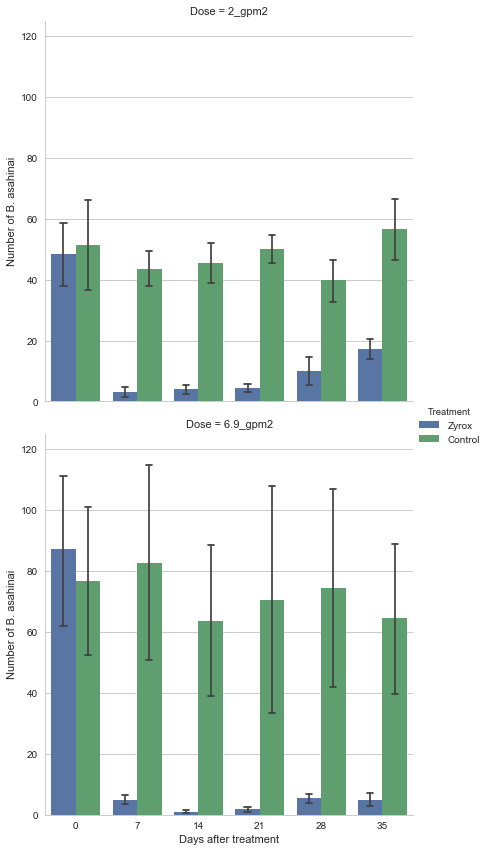

In [128]:
import seaborn as sns
sns.set(style='whitegrid')

# See this for equivalencies in sem and ci and see why ci is set to 68   http://academic.csuohio.edu/kneuendorf/c53102/hand12.pdf
g = sns.factorplot(x='variable', y='value', hue='Treatment', hue_order=['Zyrox', 'Control'], row='Dose',
                   row_order=['2_gpm2', '6.9_gpm2'], data=field_long,
                   size=6, kind="bar", palette='deep', capsize=0.1, ci=68, errwidth=1.75)
g.set_ylabels('Number of B. asahinai')
g.set_xlabels('Days after treatment')
g.set_xticklabels(['0', '7', '14', '21', '28', '35'])
g.set(ylim=(0,125))

Voila! We now have the data visualized.

Let's find out next if there are differences within and between Zyrox and Control groups for each Dose graph. We will use a repeated measures ANOVA to analyze the data. Since ANOVAs are parametric statistical tests and assume normal distribution, we will have to transform our data in order to better fit a normal distribution. Let's use a log transformation here on y data in our fieldata dataframe. More detailed steps are outlined in the cell below to create a new dataframe called 'logs'.

In [5]:
# # Grab columns 'D0_pre' through 'D35_post' and add 1
# counts = field.iloc[:,2:8] + 1

# # Log 10 transform the counts column
# np.log10(counts)

# # These two steps can be combined into 1 line of code
# fieldata_log10 = np.log10(fieldata.iloc[:,2:8] + 1)

# # Join the first two columns of fieldata with the fieldata_log10 dataframe to create a new dataframe 'logs'
# logs = fieldata.iloc[:,0:2].join(fieldata_log10)

# # All of this can be simplified into a single line of code.
logs = fieldata.iloc[:,0:2].join(np.log10(fieldata.iloc[:,2:8] + 1))
logs

,Dose,Treatment,D0_pre,D7_post,D14_post,D21_post,D28_post,D35_post
0,6.9_gpm2,Control,1.690196,1.544068,1.716003,1.380211,1.431364,1.681241
1,6.9_gpm2,Control,2.164353,2.262451,2.152288,2.238046,2.220108,2.161368
2,6.9_gpm2,Control,1.832509,1.792392,1.342423,1.380211,1.556303,1.255273
3,6.9_gpm2,Control,1.681241,1.740363,1.633468,1.812913,1.863323,1.707570
4,6.9_gpm2,Zyrox,2.110590,1.041393,0.477121,0.602060,0.954243,1.000000
5,6.9_gpm2,Zyrox,1.863323,0.845098,0.000000,0.000000,0.778151,0.301030
6,6.9_gpm2,Zyrox,1.633468,0.778151,0.000000,0.778151,0.954243,1.113943
7,6.9_gpm2,Zyrox,2.238046,0.477121,0.301030,0.301030,0.301030,0.477121
8,6.9_gpm2,Zyrox,1.361728,0.477121,0.477121,0.000000,0.778151,0.000000
9,2_gpm2,Control,1.491362,1.544068,1.812913,1.812913,1.799341,1.908485


Great! Our data is transformed. Now let's take a look at the statsmodels library which we will use to do a repeated measures ANOVA. A video tutorial can be found here

https://www.youtube.com/watch?v=xzET1rpvJ_A

We can see from the video that within group analysis requires a long form dataframe similar to seaborn.factorplot. Before we use pd.melt to reshape the dataframe, we need an extra step to index the sample so that y values will be treated as repeated measures of each sample (there are 6 repeated measures total). Let's do this by resetting the index.

(If we pd.melt without this step, each sample will be treated as a separate independent sample, which would be inaccurate)

In [6]:
logs.reset_index(inplace=True)
logs.head()

,index,Dose,Treatment,D0_pre,D7_post,D14_post,D21_post,D28_post,D35_post
0,0,6.9_gpm2,Control,1.690196,1.544068,1.716003,1.380211,1.431364,1.681241
1,1,6.9_gpm2,Control,2.164353,2.262451,2.152288,2.238046,2.220108,2.161368
2,2,6.9_gpm2,Control,1.832509,1.792392,1.342423,1.380211,1.556303,1.255273
3,3,6.9_gpm2,Control,1.681241,1.740363,1.633468,1.812913,1.863323,1.707570
4,4,6.9_gpm2,Zyrox,2.110590,1.041393,0.477121,0.602060,0.954243,1.000000


Now let's use pd.melt as we did above to make a longform dataframe of logs which we will call logs_long

In [7]:
logs_long = pd.melt(logs, id_vars=['Dose', 'Treatment', 'index'], 
                     value_vars=['D0_pre', 'D7_post', 'D14_post', 
                                 'D21_post', 'D28_post', 'D35_post'])
logs_long.head()

,Dose,Treatment,index,variable,value
0,6.9_gpm2,Control,0,D0_pre,1.690196
1,6.9_gpm2,Control,1,D0_pre,2.164353
2,6.9_gpm2,Control,2,D0_pre,1.832509
3,6.9_gpm2,Control,3,D0_pre,1.681241
4,6.9_gpm2,Zyrox,4,D0_pre,2.110590


Statsmodels currently does not support between subjects comparisions for repeated measures ANOVA (see source code on GitHub). Therefore, we'll have to divide our dataframe into individual within-subjects groups. We need four: one for each dose plus treatment group. Let's look at one group below (label_c).

In [8]:
label_c = logs_long.loc[(logs_long['Dose']=='2_gpm2') & (logs_long['Treatment']=='Control')]
label_z = logs_long.loc[(logs_long['Dose']=='2_gpm2') & (logs_long['Treatment']=='Zyrox')]
high_c = logs_long.loc[(logs_long['Dose']=='6.9_gpm2') & (logs_long['Treatment']=='Control')]
high_z = logs_long.loc[(logs_long['Dose']=='6.9_gpm2') & (logs_long['Treatment']=='Zyrox')]
label_c

# # Another way to do the above:
# gb5 = logs_long.groupby(['Dose', 'Treatment'])
# label_c = gb5.get_group(('2_gpm2', 'Control'))
# label_z = gb5.get_group(('2_gpm2', 'Zyrox'))
# high_c = gb5.get_group(('6.9_gpm2', 'Control'))
# high_z = gb5.get_group(('6.9_gpm2', 'Zyrox'))

,Dose,Treatment,index,variable,value
9,2_gpm2,Control,9,D0_pre,1.491362
10,2_gpm2,Control,10,D0_pre,1.954243
11,2_gpm2,Control,11,D0_pre,1.819544
12,2_gpm2,Control,12,D0_pre,1.361728
26,2_gpm2,Control,9,D7_post,1.544068
27,2_gpm2,Control,10,D7_post,1.799341
28,2_gpm2,Control,11,D7_post,1.602060
29,2_gpm2,Control,12,D7_post,1.602060
43,2_gpm2,Control,9,D14_post,1.812913
44,2_gpm2,Control,10,D14_post,1.690196


Let's pass each of the dose plus treatment variables we just created into a list called 'groups' so we can iterate through a repeated measures ANOVA.

In [9]:
groups = [label_c, label_z, high_c, high_z]

Now we're ready to run a repeated measures ANOVA. We'll need to import the AnovaRM class from statsmodels and pass in the necessary parameters (commented out below), fit our AnovaRM model, and then print a summary of the fit. Since we want to run this code for our four 'groups,' we can just iterate through the 'groups' list instead of writing out the AnovaRM code four times.

In [109]:
from statsmodels.stats.anova import AnovaRM
for group in groups:
    # AnovaRM(data, y column, identifier, within subject column)
    aovrm = AnovaRM(group, 'value', 'index', within=['variable'])
    fit = aovrm.fit()
    print(fit.summary())

                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable  0.6799 5.0000 15.0000 0.6455

                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable 13.5973 5.0000 15.0000 0.0000

                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable  0.7181 5.0000 15.0000 0.6198

                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable 20.1348 5.0000 20.0000 0.0000



Great! We can see that there are significant differences among measures within the Zyrox groups (2nd and 4th printed output). There are no significant differences within the control groups (1st and 3rd printed output) for each dose.

These are the expected results in each case. The Zyrox group received the insecticidal bait treatment, and the control group did not. We can tell if results are significant by looking at the P value (Pr > F in the output). If P < 0.05, then results are significant and we can say there are differences among measures in that group. If we formally report the results, we would report (F value; Num DF; P value).

Now let's find out if there are differences between Zyrox and Control groups at each measuring time point (D0, D7, etc). For this we'll use a t-test from scipy.stats, which tests for differences between two groups. First, we'll divide our dataframes further into D0, D7, etc measurement groups using groupby.

In [11]:
lc = label_c.groupby('variable')
lz = label_z.groupby('variable')
hc = high_c.groupby('variable')
hz = high_z.groupby('variable')

Now, we'll call these groups individually so we can compare them using t-tests. 

In [16]:
# label_c groups
lc0 = lc.get_group('D0_pre')
lc7 = lc.get_group('D7_post')
lc14 = lc.get_group('D14_post')
lc21 = lc.get_group('D21_post')
lc28 = lc.get_group('D28_post')
lc35 = lc.get_group('D35_post')

# label_z groups
lz0 = lz.get_group('D0_pre')
lz7 = lz.get_group('D7_post')
lz14 = lz.get_group('D14_post')
lz21 = lz.get_group('D21_post')
lz28 = lz.get_group('D28_post')
lz35 = lz.get_group('D35_post')

# high_c groups
hc0 = hc.get_group('D0_pre')
hc7 = hc.get_group('D7_post')
hc14 = hc.get_group('D14_post')
hc21 = hc.get_group('D21_post')
hc28 = hc.get_group('D28_post')
hc35 = hc.get_group('D35_post')

# high_z groups
hz0 = hz.get_group('D0_pre')
hz7 = hz.get_group('D7_post')
hz14 = hz.get_group('D14_post')
hz21 = hz.get_group('D21_post')
hz28 = hz.get_group('D28_post')
hz35 = hz.get_group('D35_post')

lc0

,Dose,Treatment,index,variable,value
9,2_gpm2,Control,9,D0_pre,1.491362
10,2_gpm2,Control,10,D0_pre,1.954243
11,2_gpm2,Control,11,D0_pre,1.819544
12,2_gpm2,Control,12,D0_pre,1.361728


Now we're ready for t-tests. Let's try first looping through a couple variable pairs so we can use fewer lines of code.

In [128]:
cs = [lc0, lc7]
zs = [lz0, lz7]

from scipy.stats import ttest_ind
ttest_ind([c['value'] for c in cs], [z['value'] for z in zs])

Ttest_indResult(statistic=array([ 0.42799623,  1.66527669,  0.70865448,  0.92393813]), pvalue=array([ 0.71033562,  0.23777354,  0.55200384,  0.45305753]))

We can see from the output above that the code looped through every possible combination of variable pairs, and pairs are not labeled in the output. Since we are interested in comparing only some pairs (and we want to know which is which), it actually makes more sense in this case to run each t-test individually.

In [18]:
# 2_gpm2 Control and Zyrox comparison at D0
ttest_ind(lc0['value'], lz0['value'])

Ttest_indResult(statistic=-0.030186443536568991, pvalue=0.97689741080560144)

In [19]:
# 2_gpm2 Control and Zyrox comparison at D7
ttest_ind(lc7['value'], lz7['value'])

Ttest_indResult(statistic=5.5419678761837501, pvalue=0.0014569029243385284)

In [20]:
# 2_gpm2 Control and Zyrox comparison at D14
ttest_ind(lc14['value'], lz14['value'])

Ttest_indResult(statistic=5.8536798303349942, pvalue=0.0010975008808403999)

In [21]:
# 2_gpm2 Control and Zyrox comparison at D21
ttest_ind(lc21['value'], lz21['value'])

Ttest_indResult(statistic=6.6883841946385258, pvalue=0.0005415814697770897)

In [22]:
# 2_gpm2 Control and Zyrox comparison at D28
ttest_ind(lc28['value'], lz28['value'])

Ttest_indResult(statistic=2.6174296441108997, pvalue=0.039722812731024328)

In [23]:
# 2_gpm2 Control and Zyrox comparison at D35
ttest_ind(lc35['value'], lz35['value'])

Ttest_indResult(statistic=4.4787055949146364, pvalue=0.004198195010712549)

Great! We can see that in the 2_gpm2 dose group, there is a significant difference (P < 0.05) between the Zyrox treatment and untreated Control at all measurement points (except for the D0 baseline measurements before treatment began).

Now let's look at differences in the 6.9_gpm2 dose group.

In [24]:
# 6.9_gpm2 Control and Zyrox comparison at D0
ttest_ind(hc0['value'], hz0['value'])

Ttest_indResult(statistic=0.0031337748360464554, pvalue=0.99758705147218973)

In [25]:
# 6.9_gpm2 Control and Zyrox comparison at D7
ttest_ind(hc7['value'], hz7['value'])

Ttest_indResult(statistic=6.0863517997222649, pvalue=0.00049773646974241297)

In [26]:
# 6.9_gpm2 Control and Zyrox comparison at D14
ttest_ind(hc14['value'], hz14['value'])

Ttest_indResult(statistic=7.6445714591949514, pvalue=0.00012169332984094425)

In [27]:
# 6.9_gpm2 Control and Zyrox comparison at D21
ttest_ind(hc21['value'], hz21['value'])

Ttest_indResult(statistic=5.3898228151157044, pvalue=0.0010195557636256819)

In [28]:
# 6.9_gpm2 Control and Zyrox comparison at D28
ttest_ind(hc28['value'], hz28['value'])

Ttest_indResult(statistic=4.932581480483754, pvalue=0.0016893083195823899)

In [29]:
# 6.9_gpm2 Control and Zyrox comparison at D35
ttest_ind(hc35['value'], hz35['value'])

Ttest_indResult(statistic=3.8884331955065097, pvalue=0.0059874778657177455)

We find the same pattern of results between the 6.9_gpm2 dose groups, and we can conclude that application of Zyrox insecticidal bait significantly reduced the cockroach population in sample plots when compared to the untreated control.